In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/p.kuznetsov/runaway


In [2]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.9.7 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
Setup complete ✅ (20 CPUs, 62.5 GB RAM, 196.2/227.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir {HOME}/roboflow_datasets
%cd {HOME}/roboflow_datasets

from roboflow import Roboflow
rf = Roboflow(api_key="T3E2M8jPKMaklrg9Ouoq")
project = rf.workspace("runaway").project("runaway-seg")
version = project.version(5)
dataset = version.download("yolov8-obb")

mkdir: cannot create directory ‘/home/p.kuznetsov/runaway/roboflow_datasets’: File exists
/home/p.kuznetsov/runaway/roboflow_datasets


/home/p.kuznetsov/runaway/venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to runaway-seg-5 in yolov8-obb:: 100%|████████████| 3019/3019 [00:00<00:00, 15458.85it/s]


## Custom Training

In [5]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=1000 imgsz=640

/home/p.kuznetsov/runaway
/home/p.kuznetsov/runaway/venv/lib/python3.9/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.

In [8]:
!ls {HOME}/runs/segment/train8/

args.yaml					      MaskP_curve.png
BoxF1_curve.png					      MaskPR_curve.png
BoxP_curve.png					      MaskR_curve.png
BoxPR_curve.png					      results.csv
BoxR_curve.png					      results.png
confusion_matrix_normalized.png			      train_batch0.jpg
confusion_matrix.png				      train_batch1.jpg
events.out.tfevents.1724779051.bakuparsec16.173690.0  train_batch2.jpg
labels_correlogram.jpg				      val_batch0_labels.jpg
labels.jpg					      val_batch0_pred.jpg
MaskF1_curve.png				      weights


/home/p.kuznetsov/runaway


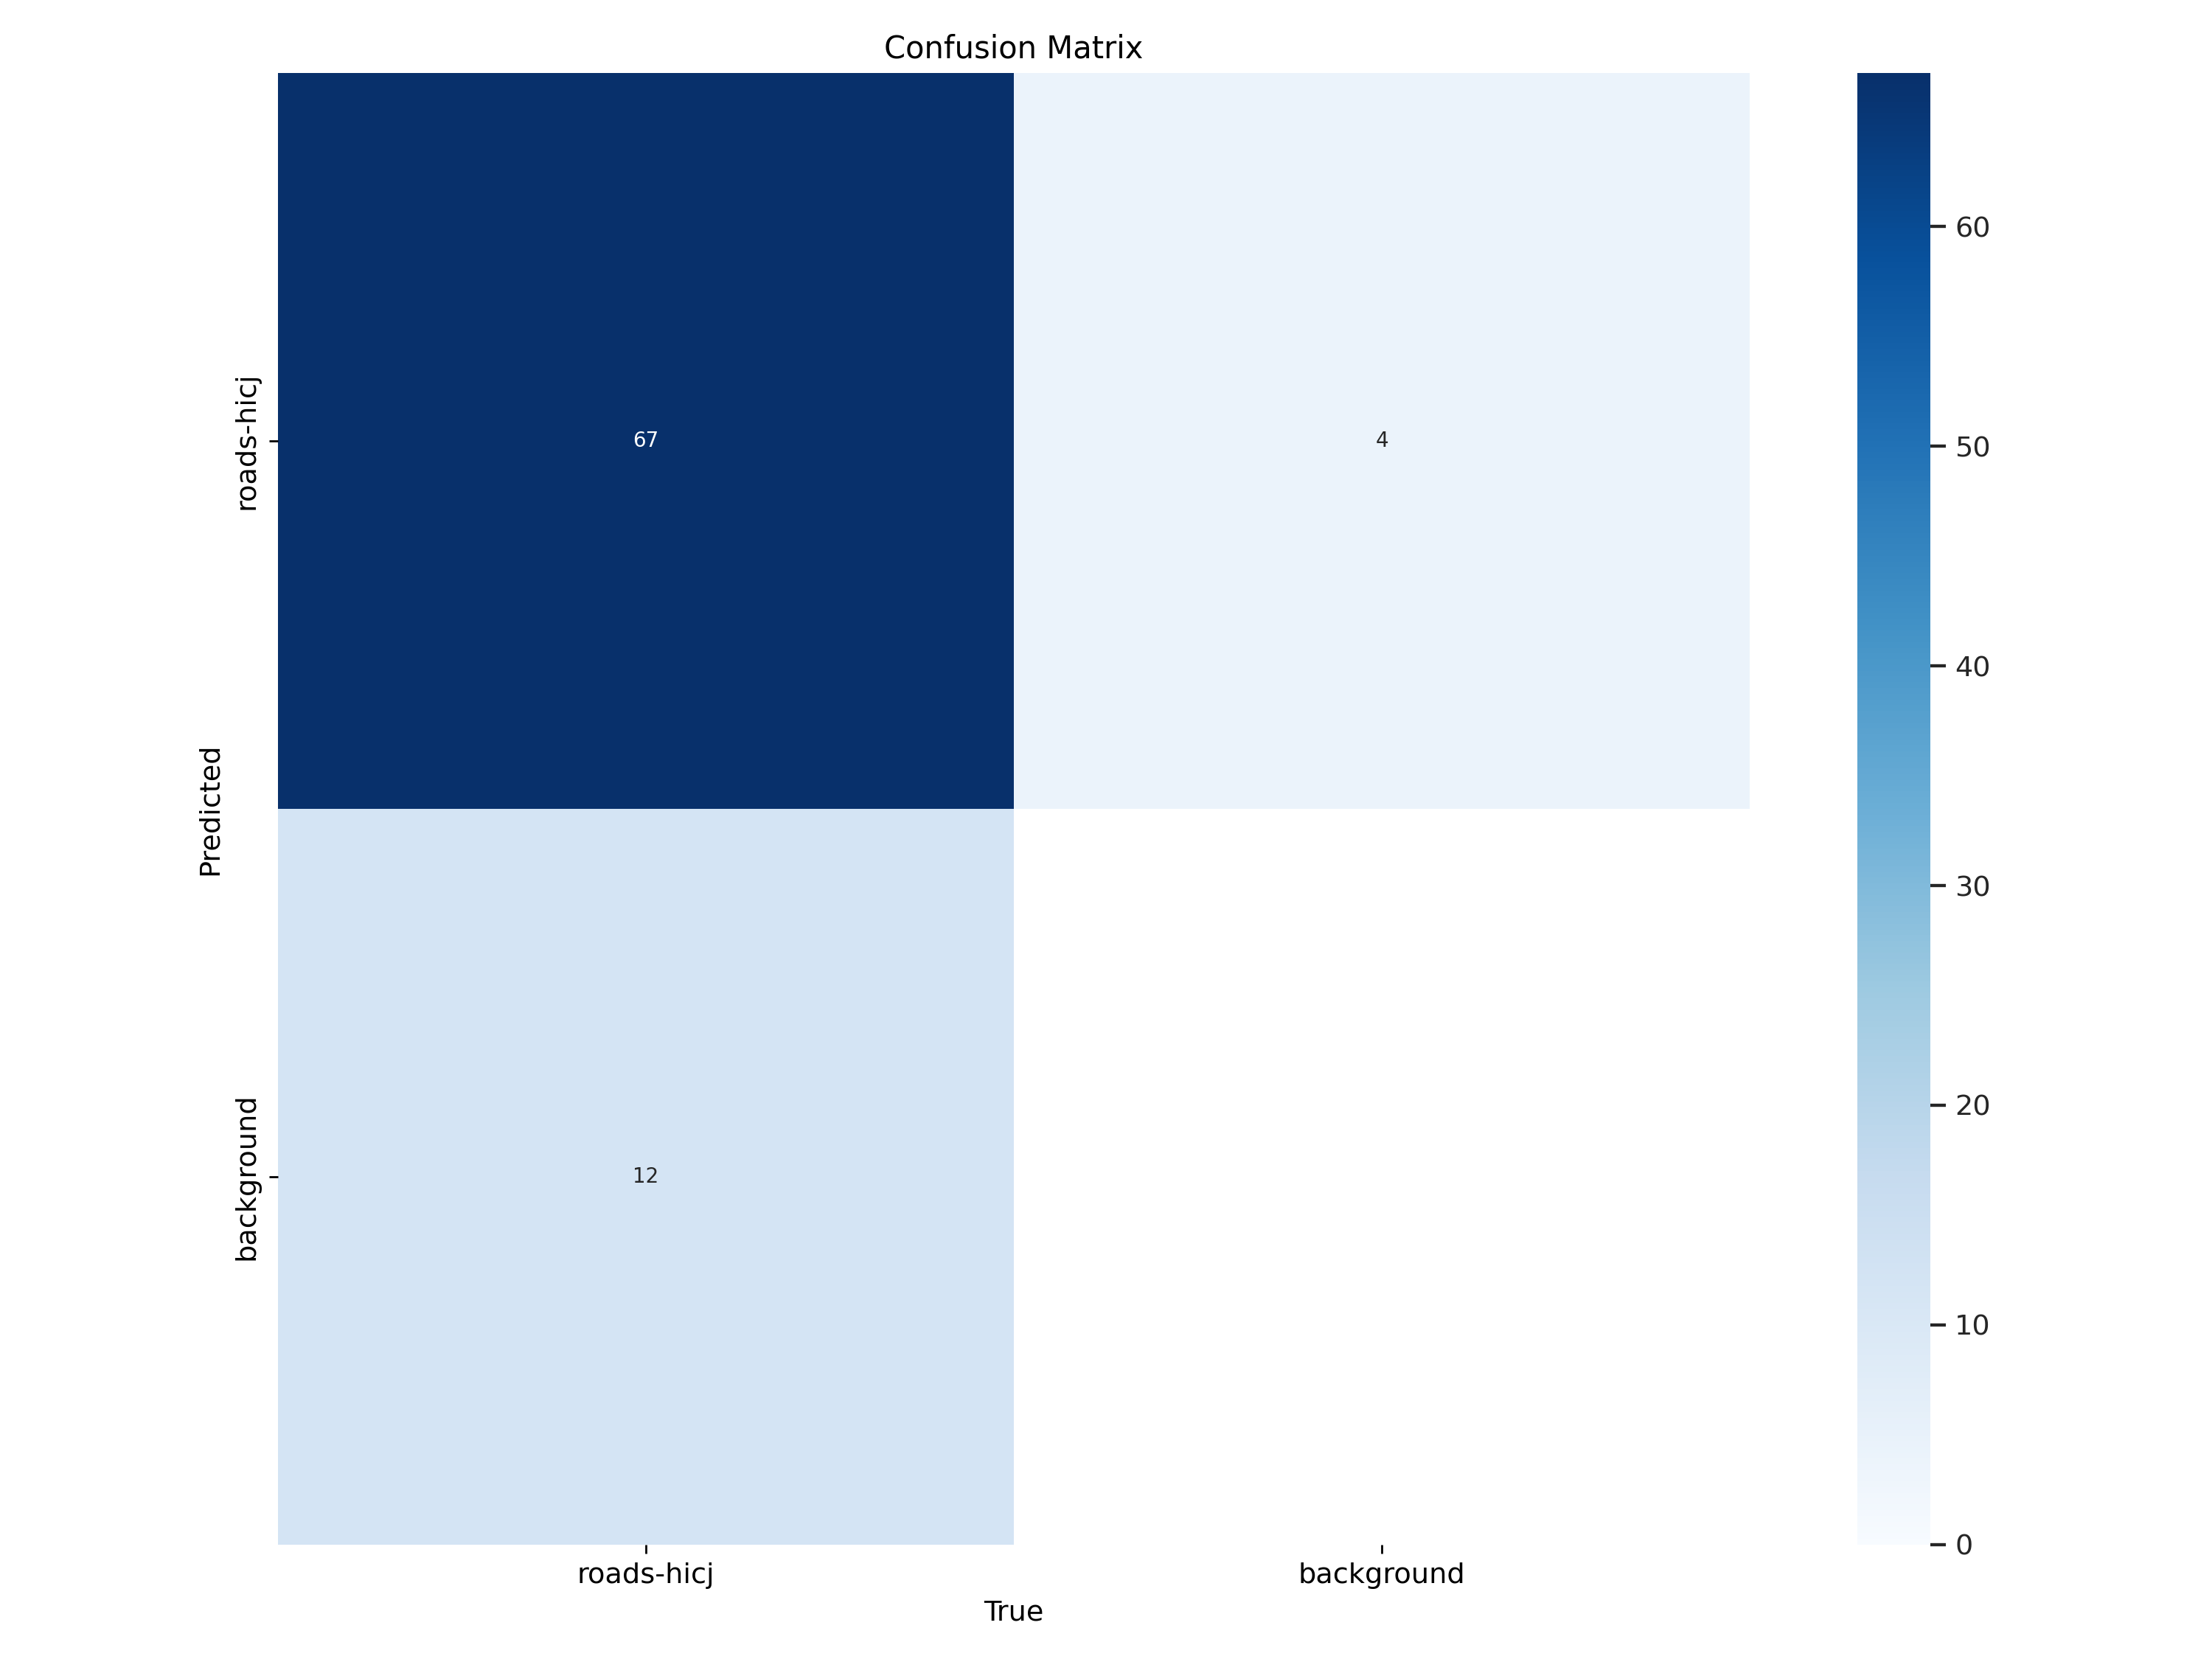

In [6]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train15/confusion_matrix.png', width=600)

/home/p.kuznetsov/runaway


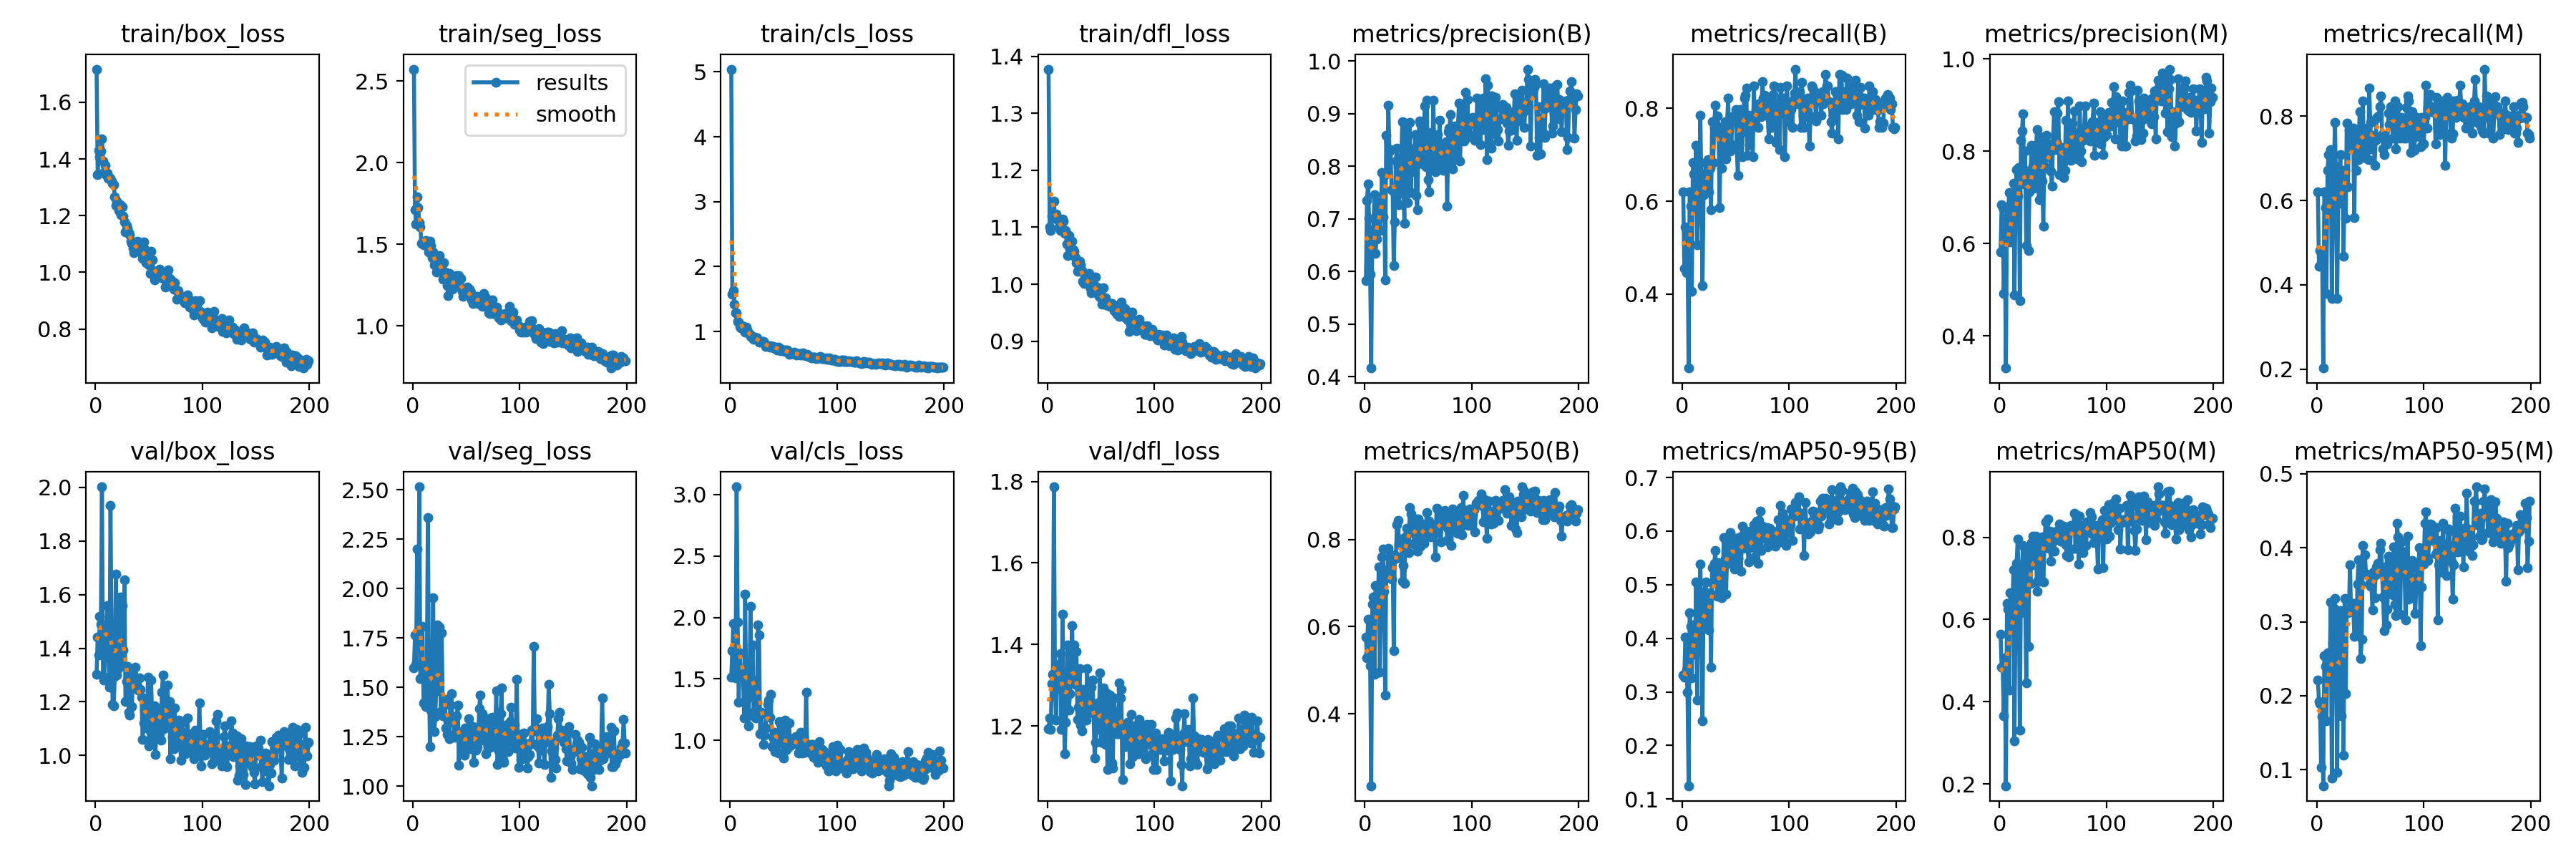

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train14/results.png', width=600)

/home/p.kuznetsov/runaway


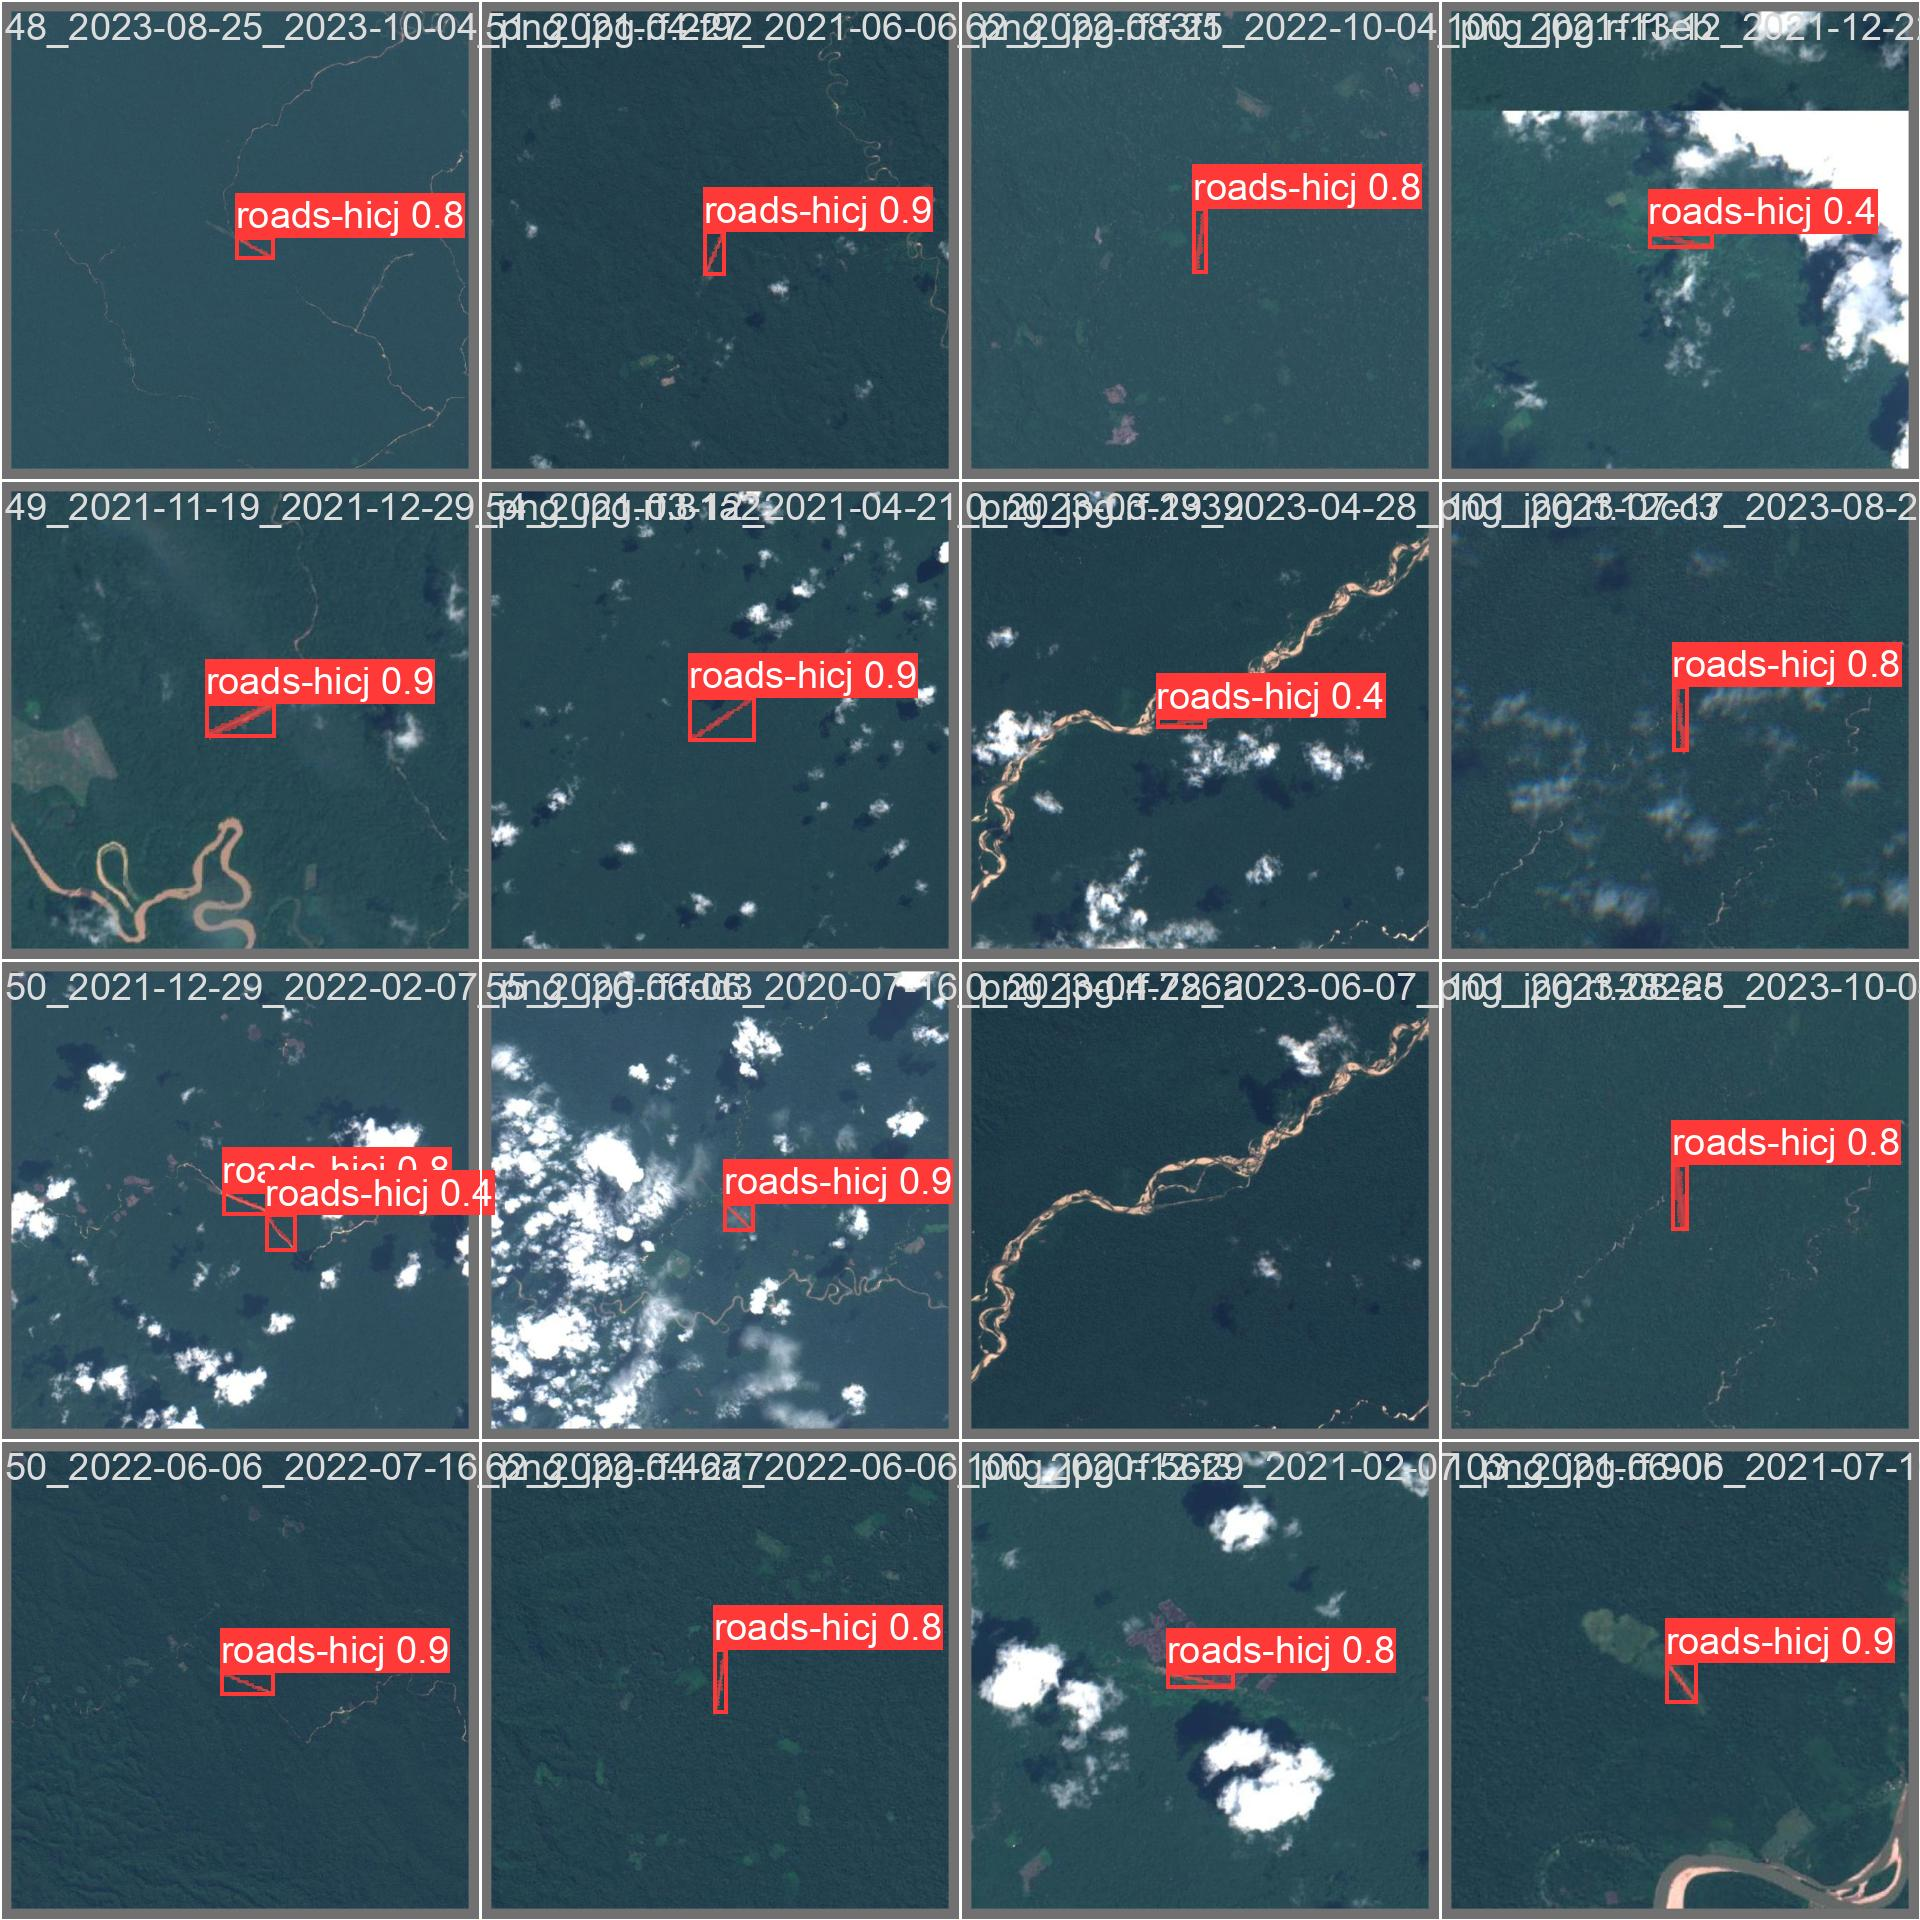

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train15/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [9]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train15/weights/best.pt data={dataset.location}/data.yaml

/home/p.kuznetsov/runaway


using dhist requires you to install the `pickleshare` library.


/home/p.kuznetsov/runaway/venv/lib/python3.9/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='c

## Inference with Custom Model

In [18]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/home/p.kuznetsov/runaway


using dhist requires you to install the `pickleshare` library.


/home/p.kuznetsov/runaway/venv/lib/python3.9/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='c

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and using later.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [8]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train15/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


View the status of your deployment at: https://app.roboflow.com/runaway/runaway-seg/5
